# 导入数据分析工具包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import preprocessing 

import warnings
warnings.filterwarnings("ignore")

# 数据加载

加载数据探索处理之后的数据。

In [2]:
all_data = pd.read_csv('./processed_zhengqi_data.csv')
display(all_data.head())

V0     V1     V2     V3     V4     V6     V7     V8    V10    V12  ...  \
0  0.566  0.016 -0.143  0.407  0.452 -1.812 -2.360 -0.436 -0.940 -0.073  ...   
1  0.968  0.437  0.066  0.566  0.194 -1.566 -2.360  0.332  0.188 -0.134  ...   
2  1.013  0.568  0.235  0.370  0.112 -1.367 -2.360  0.396  0.874 -0.072  ...   
3  0.733  0.368  0.283  0.165  0.599 -1.200 -2.086  0.403  0.011 -0.014  ...   
4  0.684  0.638  0.260  0.209  0.337 -1.073 -2.086  0.314 -0.251  0.199  ...   

     V24    V27    V29    V30    V31    V35    V36    V37  target  label  
0  0.800  0.168  0.136  0.109 -0.615 -5.101 -2.608 -3.508   0.175  train  
1  0.801  0.338 -0.128  0.124  0.032  0.364 -0.335 -0.730   0.676  train  
2  0.961  0.326 -0.009  0.361  0.277  0.364  0.765 -0.589   0.633  train  
3  1.435  0.277  0.015  0.417  0.279  0.364  0.333 -0.112   0.206  train  
4  0.881  0.332  0.183  1.078  0.328  0.364 -0.280 -0.028   0.384  train  

[5 rows x 27 columns]

In [3]:
all_data.shape

(4813, 27)

# 最大最小值归一化

处理前

In [4]:
# 特征归一化
columns=list(all_data.columns)
# 删除标签列索引
columns.remove('label')
# 删除目标值
columns.remove('target')

all_data[columns].describe()

V0           V1           V2           V3           V4  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.000080     0.000082    -0.000043    -0.000013     0.000085   
std       1.000013     1.000016     1.000007     0.999995     1.000015   
min      -4.814000    -5.488000    -4.283000    -3.956000    -4.921000   
25%      -0.468000    -0.319000    -0.625000    -0.651000    -0.428000   
50%       0.245000     0.237000     0.105000     0.073000     0.114000   
75%       0.666000     0.595000     0.698000     0.704000     0.576000   
max       2.121000     2.120000     2.828000     2.603000     4.475000   

                V6           V7           V8          V10          V12  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.000118     0.000116     0.000049    -0.000089     0.000071  ...   
std       1.000035     1.000030     0.999994     1.000017     1.000014  ...   
min      -5.649000    -5.625000    -6.059000    -2.584000    -5.505000  ...   
25%      -0.494000    -0.368000    -0.429000    -0.476000    -0.434000  ...   
50%       0.191000     0.198000     0.231000     0.133000     0.125000  ...   
75%       0.705000     0.684000     0.637000     0.626000     0.604000  ...   
max       1.895000     1.918000     2.408000     4.830000     4.011000  ...   

               V20          V23          V24          V27          V29  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean     -0.000056     0.000022    -0.000264     0.000046     0.000014   
std       0.999991     1.000003     1.000184     0.999999     0.999997   
min      -3.402000    -5.552000    -1.344000    -6.874000    -2.912000   
25%      -0.639000    -0.187000    -1.191000     0.056000    -0.721000   
50%      -0.066000     0.331000     0.094000     0.270000    -0.097000   
75%       0.496000     0.360000     0.821000     0.399000     0.623000   
max       4.056000     1.906000     2.423000     0.925000     4.580000   

               V30          V31          V35          V36          V37  
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  
mean      0.000006    -0.000004    -0.000079    -0.000110     0.000083  
std       0.999993     0.999999     1.000062     1.000019     1.000017  
min      -4.507000    -7.698000    -7.477000    -2.608000    -3.630000  
25%      -0.301000    -0.300000    -0.349000    -0.485000    -0.666000  
50%       0.038000     0.217000     0.364000     0.115000    -0.043000  
75%       0.469000     0.578000     0.364000     0.647000     0.647000  
max       3.139000     2.013000     2.324000     5.238000     3.021000  

[8 rows x 25 columns]

最大值最小值归一化

In [5]:
# 定义归一化方法
def norm_min_max(col):
    return (col-col.min())/(col.max()-col.min())

all_data[columns] = all_data[columns].apply(norm_min_max,axis=0)
all_data.describe()

V0           V1           V2           V3           V4  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.694172     0.721357     0.602300     0.603139     0.523743   
std       0.144198     0.131443     0.140628     0.152462     0.106430   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.626676     0.679416     0.514414     0.503888     0.478182   
50%       0.729488     0.752497     0.617072     0.614270     0.535866   
75%       0.790195     0.799553     0.700464     0.710474     0.585036   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V6           V7           V8          V10          V12  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.748823     0.745740     0.715607     0.348518     0.578507  ...   
std       0.132560     0.132577     0.118105     0.134882     0.105088  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.683324     0.696938     0.664934     0.284327     0.532892  ...   
50%       0.774125     0.771974     0.742884     0.366469     0.591635  ...   
75%       0.842259     0.836405     0.790835     0.432965     0.641971  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V23          V24          V27          V29          V30  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.744438     0.356712     0.881401     0.388683     0.589459   
std       0.134085     0.265512     0.128221     0.133475     0.130786   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.719362     0.040616     0.888575     0.292445     0.550092   
50%       0.788817     0.381736     0.916015     0.375734     0.594428   
75%       0.792706     0.574728     0.932555     0.471837     0.650798   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V31          V35          V36          V37       target  
count  4813.000000  4813.000000  4813.000000  4813.000000  2888.000000  
mean      0.792709     0.762873     0.332385     0.545795     0.126353  
std       0.102976     0.102037     0.127456     0.150356     0.983966  
min       0.000000     0.000000     0.000000     0.000000    -3.044000  
25%       0.761816     0.727273     0.270584     0.445647    -0.350250  
50%       0.815055     0.800020     0.347056     0.539317     0.313000  
75%       0.852229     0.800020     0.414861     0.643061     0.793250  
max       1.000000     1.000000     1.000000     1.000000     2.538000  

[8 rows x 26 columns]

sklearn自带方法最大值最小值归一化

In [6]:
# 导包
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()

# 处理完后，数据变换为Numpy数组
all_data[columns] = min_max_scaler.fit_transform(all_data[columns])

all_data[columns] = pd.DataFrame(all_data,columns=columns)
all_data.describe()

V0           V1           V2           V3           V4  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.694172     0.721357     0.602300     0.603139     0.523743   
std       0.144198     0.131443     0.140628     0.152462     0.106430   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.626676     0.679416     0.514414     0.503888     0.478182   
50%       0.729488     0.752497     0.617072     0.614270     0.535866   
75%       0.790195     0.799553     0.700464     0.710474     0.585036   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V6           V7           V8          V10          V12  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.748823     0.745740     0.715607     0.348518     0.578507  ...   
std       0.132560     0.132577     0.118105     0.134882     0.105088  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.683324     0.696938     0.664934     0.284327     0.532892  ...   
50%       0.774125     0.771974     0.742884     0.366469     0.591635  ...   
75%       0.842259     0.836405     0.790835     0.432965     0.641971  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V23          V24          V27          V29          V30  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.744438     0.356712     0.881401     0.388683     0.589459   
std       0.134085     0.265512     0.128221     0.133475     0.130786   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.719362     0.040616     0.888575     0.292445     0.550092   
50%       0.788817     0.381736     0.916015     0.375734     0.594428   
75%       0.792706     0.574728     0.932555     0.471837     0.650798   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V31          V35          V36          V37       target  
count  4813.000000  4813.000000  4813.000000  4813.000000  2888.000000  
mean      0.792709     0.762873     0.332385     0.545795     0.126353  
std       0.102976     0.102037     0.127456     0.150356     0.983966  
min       0.000000     0.000000     0.000000     0.000000    -3.044000  
25%       0.761816     0.727273     0.270584     0.445647    -0.350250  
50%       0.815055     0.800020     0.347056     0.539317     0.313000  
75%       0.852229     0.800020     0.414861     0.643061     0.793250  
max       1.000000     1.000000     1.000000     1.000000     2.538000  

[8 rows x 26 columns]

# 数据正态化操作（Box-Cox变换）

## 查看特征变量‘V0’的数据分布直方图、并绘制Q-Q图（概率图）查看数据是否近似于正态分布、特征目标值相关性

In [7]:
# 获取训练数据
cond = all_data['label'] == 'train'
train_data = all_data[cond]

train_data.drop(labels='label',axis = 1,inplace=True)

Text(0.5, 1.0, 'corr=0.87')

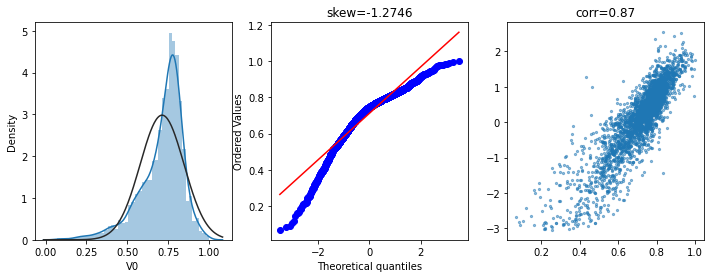

In [8]:
plt.figure(figsize=(12,4))

# 绘制直方图
ax = plt.subplot(1,3,1)
# 拟合标准正态分布
sns.distplot(train_data['V0'],fit=stats.norm)

# 绘制Q-Q图
ax = plt.subplot(1,3,2)
# 生成样本数据相对于指定理论分布(默认为正态分布)的分位数的概率图
stats.probplot(train_data['V0'],plot = ax)
plt.title('skew='+'{:.4f}'.format(stats.skew(train_data['V0'])))

# 绘制特征和目标值相关性散点图
ax = plt.subplot(1,3,3)
plt.scatter(train_data['V0'], train_data['target'],s = 5,alpha=0.5)
plt.title('corr='+'{:.2f}'.format(np.corrcoef(train_data['V0'],
                                              train_data['target'])[0][1]))
# plt.savefig('./6-Box-Cox.jpg',dpi = 200)

skew函数计算数据集的偏度：
skew = 0，正态分布
skew > 0，偏移了右边
skew < 0，偏移了左边

## 查看所有特征直方图、Q-Q图、特征目标值散点图

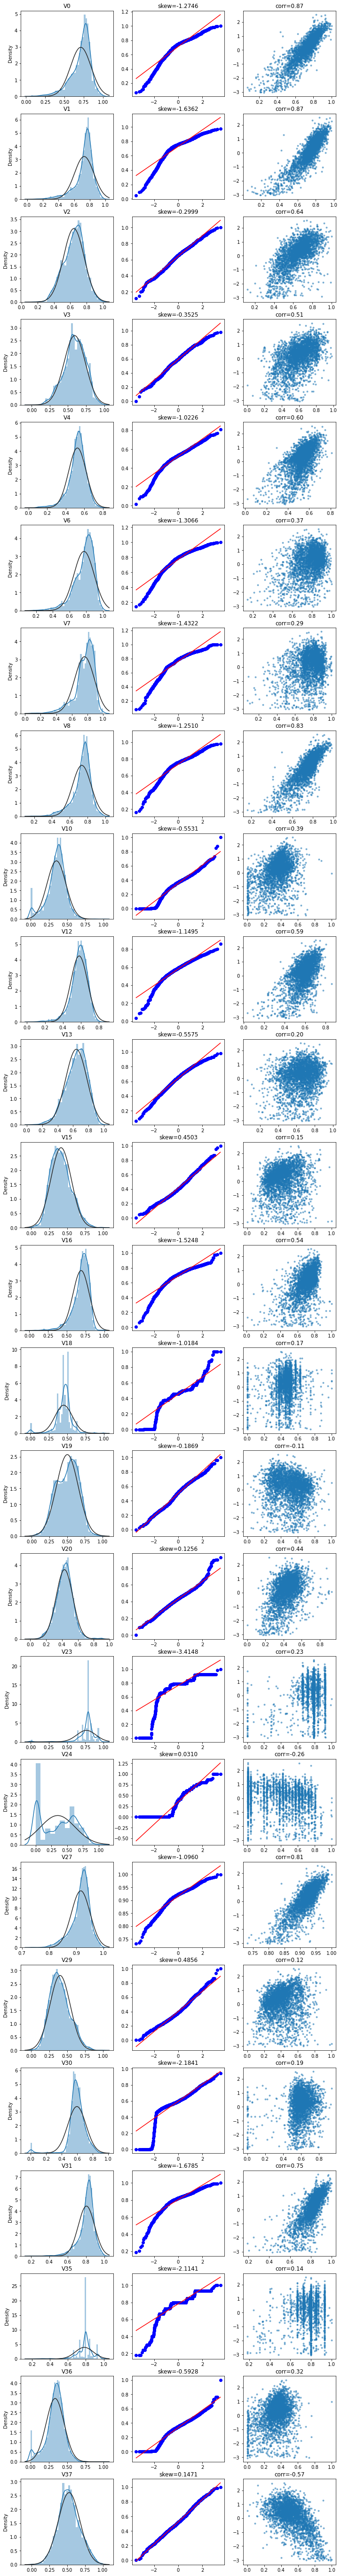

In [9]:
fcols = 3
columns = list(train_data.columns)
columns.remove('target')
frows = len(columns)
plt.figure(figsize=(4*fcols,4*frows))
i=0
for col in columns:
    feature = train_data[[col, 'target']]
        
    i+=1
    plt.subplot(frows,fcols,i)
    sns.distplot(feature[col] , fit=stats.norm);
    plt.title(col)
    plt.xlabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(feature[col], plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(feature[col])))
    plt.xlabel('')
    plt.ylabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(feature[col], feature['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(feature[col], feature['target'])[0][1]))

## 对特征，进行Box-Cox变换，Box-Cox变换可以明显地改善数据的正态性、对称性和方差相等性，对许多实际数据都是行之有效的

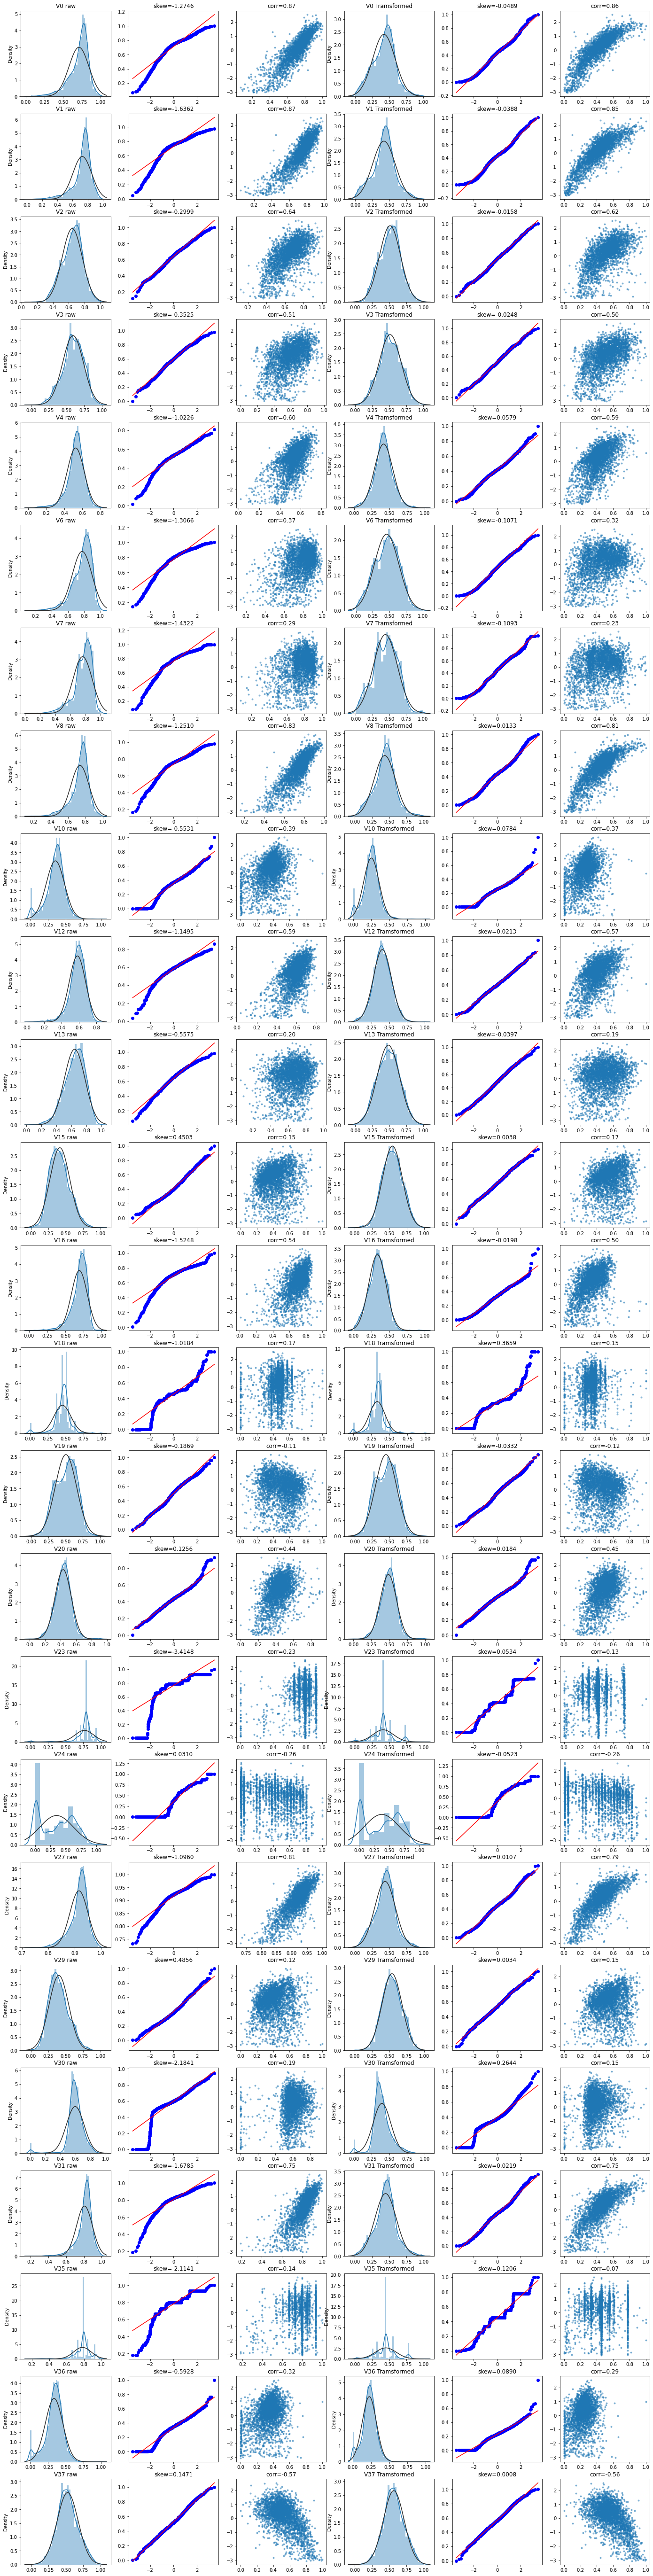

In [10]:
# 绘图显示Box-Cox变换对数据分布影响
fcols = 6
columns = list(train_data.columns)
columns.remove('target')
frows = len(columns)
plt.figure(figsize=(4*fcols,4*frows))
i=0
def norm_min_max(feature):
    return (feature-feature.min())/(feature.max()-feature.min())

for col in columns:
    feature = train_data[[col, 'target']].dropna()

    i+=1
    plt.subplot(frows,fcols,i)
    sns.distplot(feature[col] , fit=stats.norm);
    plt.title(col+' raw')
    plt.xlabel('')

    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(feature[col], plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(feature[col])))
    plt.xlabel('')
    plt.ylabel('')

    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(feature[col], feature['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(feature[col], feature['target'])[0][1]))
    
    # Box-Cox转变，视图可视化
    i+=1
    plt.subplot(frows,fcols,i)
    trans_feature, lambda_feature = stats.boxcox(feature[col].dropna()+1)
    trans_feature = norm_min_max(trans_feature)      
    sns.distplot(trans_feature , fit=stats.norm);
    plt.title(col+' Tramsformed')
    plt.xlabel('')

    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(trans_feature, plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_feature)))
    plt.xlabel('')
    plt.ylabel('')

    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(trans_feature, feature['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_feature,feature['target'])[0][1]))

从回归结果可见，经过Box-Cox变换数据分布，更加正态化，所以进行Box-Cox变换很有必要 Box-Cox变换是Box和Cox在1964年提出的一种广义幂变换方法，是统计建模中常用的一种数据变换，用于连续的响应变量不满足正态分布的情况 Box-Cox变换的一般形式为:

𝑦(𝜆)={𝑦𝜆−1𝜆,𝜆≠0𝑙𝑛𝑦,𝑦=0

In [11]:
# 进行Box-Cox变换
columns=list(all_data.columns)
# 删除标签列索引
columns.remove('label')
# 删除目标值
columns.remove('target')

for col in columns:   
    # transform column
    all_data.loc[:,col], _ = stats.boxcox(all_data.loc[:,col]+1)

In [12]:
A = np.array([0,1,4,5])
stats.boxcox(A + 1)

(array([0.        , 0.79703506, 2.2471087 , 2.60349868]), 0.39400163959564993)

In [13]:
np.log(0 + 1)

0.0

In [14]:
lambda_ = 0.39400163959564993

((A+1)**lambda_ - 1)/lambda_

array([0.        , 0.79703506, 2.2471087 , 2.60349868])

# 定义数据获取方法

In [15]:
from sklearn.model_selection import train_test_split
def get_train_data():
    train_data = all_data[all_data["label"]=="train"]
    # 数据拆分：训练数据和验证数据
    y = train_data.target
    X = train_data.drop(["label","target"],axis=1)
    return X,y
# 提取训练和验证数据
def split_train_data():
    train_data = all_data[all_data["label"]=="train"]
    # 数据拆分：训练数据和验证数据
    y = train_data.target
    X = train_data.drop(["label","target"],axis=1)
    X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2)
    return X_train,X_valid,y_train,y_valid

# 提取预测数据
def get_test_data():
    # 参数drop = True，表示将原来的行索引，直接删除
    test_data = all_data[all_data["label"]=="test"].reset_index(drop=True)
    return test_data.drop(["label","target"],axis=1)

# 异常值过滤

## 异常值检测函数

In [16]:
# 基于模型预测的异常值检测
from sklearn.metrics import mean_squared_error

def find_outliers(model, X, y, sigma = 3):
    # 模型训练
    model.fit(X,y)
    y_pred = pd.Series(model.predict(X), index=y.index)
    
    # 计算预测值和真实值之差
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    
    # 异常值计算
    z = (resid - mean_resid)/std_resid # Z-score归一化 
    outliers = z[abs(z)>sigma].index # 正太分布异常值过滤：3σ法则
    
    # 输出模型评价
    print('R2=',model.score(X,y))
    print("mse=",mean_squared_error(y,y_pred))
    print('---------------------------------------')

    # 残差数据
    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')
    
    # 异常值点
    print(len(outliers),'outliers:')
    print(outliers.tolist())

    # 数据可视化
    # 真实值预测值散点图
    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred');
    
    # 真实值和残差散点图
    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');

    # 直方图
    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png',dpi = 200)
    
    return outliers

## 岭回归算法查找异常值

R2= 0.8689413871781883
mse= 0.12684550388162372
---------------------------------------
mean of residuals: 2.7522997731315124e-16
std of residuals: 0.3562154413673822
---------------------------------------
30 outliers:
[348, 884, 1046, 1069, 1145, 1164, 1310, 1458, 1493, 1523, 1530, 1704, 1874, 2002, 2159, 2160, 2279, 2528, 2620, 2645, 2647, 2667, 2668, 2669, 2696, 2697, 2769, 2807, 2842, 2863]


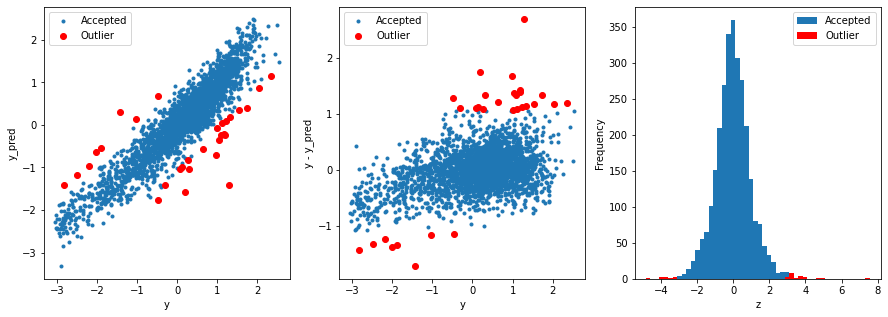

In [17]:
# 获取训练数据
from sklearn.linear_model import Ridge
X_train, y_train = get_train_data()

# 使用岭回归查找异常值
outliers1 = find_outliers(Ridge(), X_train, y_train)

## 套索回归算法查找异常值

R2= 0.6220218641738001
mse= 0.3658273658084362
---------------------------------------
mean of residuals: 7.096893094738578e-16
std of residuals: 0.6049413865908968
---------------------------------------
31 outliers:
[332, 343, 376, 430, 884, 1064, 1065, 1126, 1311, 1365, 1442, 1477, 1828, 1874, 1932, 2030, 2253, 2254, 2255, 2256, 2257, 2279, 2281, 2579, 2580, 2581, 2636, 2663, 2667, 2790, 2807]


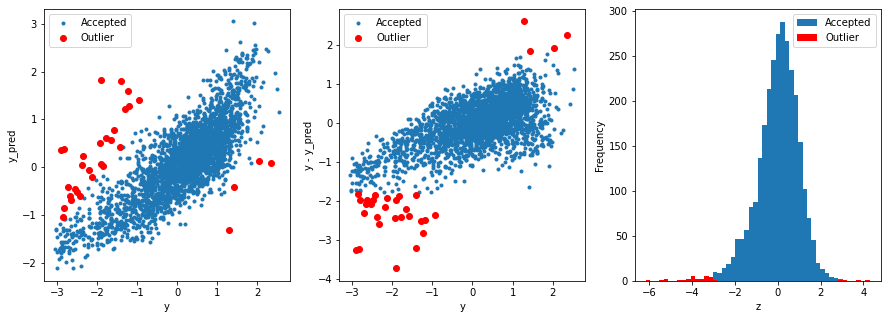

In [19]:
# 获取训练数据
from sklearn.linear_model import Lasso
X_train, y_train = get_train_data()

# 使用岭回归查找异常值
outliers2 = find_outliers(Lasso(), X_train, y_train)

## 支持向量机SVR算法查找异常值

R2= 0.663192475342922
mse= 0.32598025613421766
---------------------------------------
mean of residuals: -0.04418097187410799
std of residuals: 0.5693334127607408
---------------------------------------
39 outliers:
[332, 343, 376, 884, 1064, 1065, 1126, 1138, 1311, 1365, 1442, 1477, 1828, 1874, 1932, 2030, 2161, 2253, 2254, 2255, 2256, 2257, 2264, 2279, 2281, 2334, 2339, 2579, 2580, 2581, 2620, 2635, 2636, 2637, 2645, 2663, 2667, 2790, 2807]


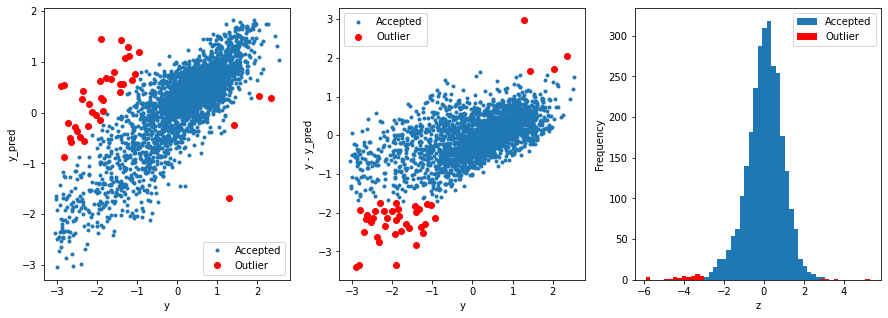

In [18]:
# 获取训练数据
from sklearn.svm import SVR
X_train, y_train = get_train_data()

# 使用岭回归查找异常值
outliers3 = find_outliers(SVR(), X_train, y_train)

## Xgboost算法查找异常值

R2= 0.997493869079832
mse= 0.0024255669468609044
---------------------------------------
mean of residuals: 6.8967232026446646e-06
std of residuals: 0.04925857354764189
---------------------------------------
45 outliers:
[82, 124, 155, 178, 204, 293, 303, 577, 584, 620, 621, 641, 642, 674, 676, 722, 805, 846, 847, 1372, 1433, 1530, 1707, 1874, 1878, 1950, 1972, 1973, 1981, 2003, 2025, 2098, 2099, 2172, 2189, 2211, 2393, 2556, 2669, 2670, 2683, 2687, 2696, 2718, 2876]


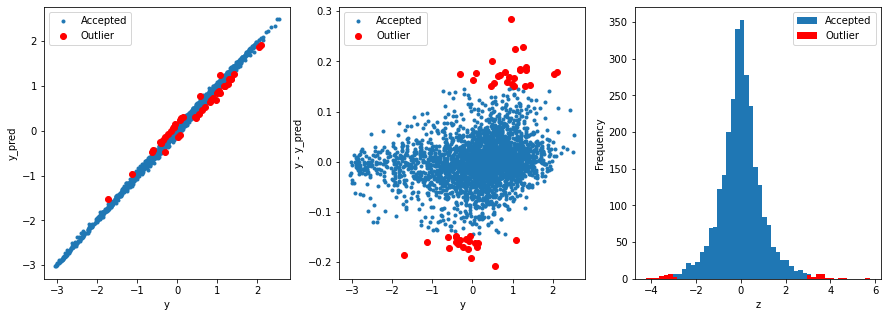

In [20]:
# 获取训练数据
from xgboost import XGBRegressor
X_train, y_train = get_train_data()

# 使用岭回归查找异常值
outliers4 = find_outliers(XGBRegressor(), X_train, y_train)

## 过滤异常值

In [21]:
outliers12 = np.union1d(outliers1,outliers2)
outliers34 = np.union1d(outliers3,outliers4)
outliers = np.union1d(outliers12,outliers34)
display(outliers)
# 过滤异常值
all_data = all_data.drop(labels=outliers)
all_data.to_csv('./processed_zhengqi_data2.csv',index=False)
all_data.shape

array([  82,  124,  155,  178,  204,  293,  303,  332,  343,  348,  376,
        430,  577,  584,  620,  621,  641,  642,  674,  676,  722,  805,
        846,  847,  884, 1046, 1064, 1065, 1069, 1126, 1138, 1145, 1164,
       1310, 1311, 1365, 1372, 1433, 1442, 1458, 1477, 1493, 1523, 1530,
       1704, 1707, 1828, 1874, 1878, 1932, 1950, 1972, 1973, 1981, 2002,
       2003, 2025, 2030, 2098, 2099, 2159, 2160, 2161, 2172, 2189, 2211,
       2253, 2254, 2255, 2256, 2257, 2264, 2279, 2281, 2334, 2339, 2393,
       2528, 2556, 2579, 2580, 2581, 2620, 2635, 2636, 2637, 2645, 2647,
       2663, 2667, 2668, 2669, 2670, 2683, 2687, 2696, 2697, 2718, 2769,
       2790, 2807, 2842, 2863, 2876])

(4709, 27)

In [22]:
outliers.shape

(104,)

# 多重共线性

## 查看原数据方差膨胀因子

In [23]:
# 安装相应库 pip install statsmodels
# 多重共线性方差膨胀因子
from statsmodels.stats.outliers_influence import variance_inflation_factor

#多重共线性
X_train,y_train = get_train_data()
X_train = np.matrix(X_train)
VIF_list=[round(variance_inflation_factor(X_train, i),2) for i in range(X_train.shape[1])]
print(VIF_list)

[110.83, 105.23, 78.58, 18.48, 153.54, 129.92, 69.49, 158.33, 59.58, 113.25, 15.1, 186.1, 84.68, 13.49, 12.8, 42.74, 36.63, 4.89, 121.61, 234.16, 12.55, 76.2, 39.29, 53.41, 38.4]


In [24]:
X_train[1]

matrix([[4.98827111e+00, 7.27983991e+00, 9.84897448e-01, 9.64537881e-01,
         1.11050804e+00, 2.14823591e+00, 1.56818445e+00, 5.37711454e+00,
         4.93786072e-01, 1.46395966e+00, 1.47074876e+00, 3.05909581e-01,
         2.74740785e+00, 5.16994507e-01, 5.20673599e-01, 3.53128864e-01,
         1.15884228e+01, 5.31820174e-01, 1.10397013e+04, 2.80396810e-01,
         1.80004912e+00, 2.19397312e+01, 9.17863746e+00, 3.69734061e-01,
         4.07834273e-01]])

In [27]:
X_train

V0        V1        V2        V3        V4        V6        V7  \
0     4.147084  5.841184  0.918479  0.921088  1.205738  1.864357  1.568184   
1     4.988271  7.279840  0.984897  0.964538  1.110508  2.148236  1.568184   
2     5.090224  7.783637  1.040170  0.911078  1.081218  2.401542  1.568184   
3     4.481728  7.025646  1.056127  0.856314  1.262126  2.631664  1.888754   
4     4.381416  8.064594  1.048467  0.867969  1.162709  2.818014  1.888754   
...        ...       ...       ...       ...       ...       ...       ...   
2883  3.465175  5.714768  0.920043  0.855257  1.262515  6.893749  8.776083   
2884  4.033672  7.740242  1.060468  0.861075  1.235463  6.868987  8.776083   
2885  2.582180  3.890662  0.814343  0.834999  1.089743  6.583436  8.910216   
2886  2.826006  4.973040  0.856599  0.800397  1.204604  6.304771  8.771641   
2887  3.776075  7.069312  0.893000  0.800397  1.178315  6.276006  8.630500   

            V8       V10       V12  ...       V20        V23       V24  \
0     3.799373  0.262782  1.495579  ...  0.354414  11.581656  0.531587   
1     5.377115  0.493786  1.463960  ...  0.353129  11.588423  0.531820   
2     5.529584  0.655989  1.496101  ...  0.352426  11.574893  0.569035   
3     5.546473  0.454651  1.526601  ...  0.334126  11.554624  0.677685   
4     5.334858  0.398723  1.642254  ...  0.323719  11.554624  0.550463   
...        ...       ...       ...  ...       ...        ...       ...   
2883  4.586181  0.531721  1.777871  ...  0.353714   8.434421  0.009014   
2884  5.878007  0.439045  1.764967  ...  0.351604   8.388166  0.007955   
2885  3.168138  0.505492  1.437874  ...  0.304520   8.362563  0.009014   
2886  3.523714  0.368989  1.506046  ...  0.283207   9.945476  0.008220   
2887  5.173098  0.364102  1.725493  ...  0.300204   9.945476  0.007955   

               V27       V29       V30        V31       V35       V36  \
0      8923.054505  0.300080  1.788352  15.555187  0.519843  0.000000   
1     11039.701316  0.280397  1.800049  21.939731  9.178637  0.369734   
2     10875.927640  0.289379  1.992162  24.904398  9.178637  0.611879   
3     10230.746478  0.291168  2.039607  24.929990  9.178637  0.511483   
4     10957.524880  0.303493  2.663214  25.564331  9.178637  0.380802   
...            ...       ...       ...        ...       ...       ...   
2883   9161.998981  0.299497  1.553474  32.592966  6.800553  0.567093   
2884  11516.496689  0.311235  1.498489  27.414421  6.800553  0.315030   
2885   7764.811686  0.311235  1.574006  24.789518  6.800553  0.657281   
2886   8537.870895  0.305874  2.645632  21.008748  7.156603  0.376563   
2887   9383.393900  0.293543  1.748218  21.107979  7.279759  0.324214   

           V37  
0     0.018284  
1     0.407834  
2     0.426451  
3     0.488736  
4     0.499597  
...        ...  
2883  0.590687  
2884  0.453871  
2885  0.598497  
2886  0.574134  
2887  0.552931  

[2784 rows x 25 columns]

In [28]:
X_train.shape[1]

25

## PCA降维

In [26]:
X_train,y_train = get_train_data()
X_train.shape

(2784, 25)

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 22,whiten=True)

X_train,y_train = get_train_data()
X_train_pca = np.matrix(pca.fit_transform(X_train))
VIF_pca_list=[round(variance_inflation_factor(X_train_pca, i),2) for i in range(X_train_pca.shape[1])]
print(VIF_pca_list)
# 数据保存
np.savez('./train_data_pca',X_train = X_train_pca,y_train = y_train)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [30]:
X_test = get_test_data()
X_test_pca = pca.transform(X_test)

# 查看数据
display(X_test_pca)
# 数据保存
np.savez('./test_data_pca',X_test = X_test_pca)

array([[-4.10369816e-01, -1.07256950e-01, -4.28225234e-01, ...,
         4.49496881e-01,  2.42069008e-01,  5.45925386e-01],
       [-3.42908432e-01,  2.40043252e-01, -3.75608332e-01, ...,
        -2.11354339e-01,  4.13076454e-01,  6.94251947e-01],
       [-8.37774875e-01,  9.51729522e-01, -3.57728175e-01, ...,
        -8.80416023e-04,  6.74195288e-01,  1.13156000e+00],
       ...,
       [-3.09477429e+00, -5.92746363e-01, -1.13986964e+00, ...,
        -4.48546834e-01, -1.04121730e-01,  4.79249441e-02],
       [-3.01926790e+00, -6.20882853e-01, -1.15546927e+00, ...,
         1.01244961e-01,  2.54477864e-01, -7.73055560e-02],
       [-2.92817016e+00, -7.27309940e-01, -1.16525185e+00, ...,
         2.05687731e-01, -1.29672913e+00,  2.12695597e+00]])

# 模型初验

## 导入相关库

In [2]:
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor     #决策树回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.svm import SVR  #支持向量回归
# import lightgbm as lgb #lightGbm模型
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

## 切分训练数据和线下验证数据

In [3]:
#采用 pca 保留16维特征的数据
train_data = np.load('./train_data_pca.npz')['X_train']
target_data = np.load('./train_data_pca.npz')['y_train']

# 切分数据 训练数据80% 验证数据20%
X_train,X_valid,y_train,y_valid=train_test_split(train_data,target_data,
                                                               test_size=0.2)

## 多元线性回归模型

In [4]:
clf = LinearRegression()
clf.fit(X_train, y_train)
score = mean_squared_error(y_valid, clf.predict(X_valid))
print("LinearRegression:   ", score)

LinearRegression:    0.09587348071503904


## 训练数据验证数据评估可视化

In [5]:
for i in range(2,100,10):
    print(i)

2
12
22
32
42
52
62
72
82
92


## 学习曲线的绘制函数定义

In [8]:
import  matplotlib.pyplot as plt

In [6]:
def plot_learning_curve(model, X_train, X_valid, y_train, y_valid):
    '绘制学习曲线：只需要传入算法(或实例对象)、X_train、X_valid、y_train、y_valid'
    train_score = []
    valid_score = []
    
    for i in range(10, len(X_train)+1, 10):
        model.fit(X_train[:i], y_train[:i])
        # 训练数据评估
        y_train_predict = model.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        
        # 验证数据评估
        y_valid_predict = model.predict(X_valid)
        valid_score.append(mean_squared_error(y_valid, y_valid_predict))
    
    # 可视化
    plt.plot([i for i in range(1, len(train_score)+1)],
            train_score, label="train")
    plt.plot([i for i in range(1, len(valid_score)+1)],
            valid_score, label="test")
    plt.legend()

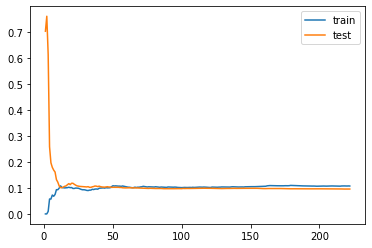

In [9]:
plot_learning_curve(LinearRegression(), X_train, X_valid, y_train, y_valid)
# plt.savefig('./9-多元线性回归训练验证数据评估对比.png',dpi = 200)

## K近邻回归

In [10]:
for i in range(3,20):
    clf = KNeighborsRegressor(n_neighbors=i) # 最近三个
    clf.fit(X_train, y_train)
    score = mean_squared_error(y_valid, clf.predict(X_valid))
    print("KNeighborsRegressor:   ", score)

KNeighborsRegressor:    0.2432213937761819
KNeighborsRegressor:    0.22974087915170555
KNeighborsRegressor:    0.21944463145421902
KNeighborsRegressor:    0.2235431369938161
KNeighborsRegressor:    0.22617981958744
KNeighborsRegressor:    0.22934374730700177
KNeighborsRegressor:    0.23036396121196
KNeighborsRegressor:    0.23503673078994616
KNeighborsRegressor:    0.23564378174102704
KNeighborsRegressor:    0.24050821521543983
KNeighborsRegressor:    0.2430353485281464
KNeighborsRegressor:    0.24719708962920894
KNeighborsRegressor:    0.24837474381009375
KNeighborsRegressor:    0.2500519523044771
KNeighborsRegressor:    0.2543355481043405
KNeighborsRegressor:    0.25775260696079083
KNeighborsRegressor:    0.2565373225182393


## 决策树回归

In [11]:
clf = DecisionTreeRegressor() 
clf.fit(X_train, y_train)
score = mean_squared_error(y_valid, clf.predict(X_valid))
print("DecisionTreeRegressor:   ", score)

DecisionTreeRegressor:    0.24087987791741475


## 随机森林回归

In [13]:
clf = RandomForestRegressor(n_estimators=200, # 200棵树模型
                            max_depth= 10,
                            max_features = 'auto',# 构建树时，特征筛选量
                            min_samples_leaf=10,# 是叶节点所需的最小样本数
                            min_samples_split=40,# 是分割所需的最小样本数
                            criterion='mse')
clf.fit(X_train, y_train)
score = mean_squared_error(y_valid, clf.predict(X_valid))
print("RandomForestRegressor:   ", score)

RandomForestRegressor:    0.15393850113886678


CPU times: user 4min 18s, sys: 1.61 s, total: 4min 20s
Wall time: 4min 20s


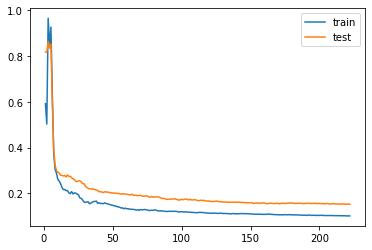

In [14]:
%%time
clf = RandomForestRegressor(n_estimators=200, # 200棵树模型
                            max_depth= 10,
                            max_features = 'auto',# 构建树时，特征筛选量
                            min_samples_leaf=10,# 是叶节点所需的最小样本数
                            min_samples_split=40,# 是分割所需的最小样本数
                            criterion='mse')
plot_learning_curve(clf, X_train, X_valid, y_train, y_valid)

## SVR支持向量机

In [15]:
'''
C：
表示错误项的惩罚系数C越大，即对分错样本的惩罚程度越大，因此在训练样本中准确率越高，
但是泛化能力降低；相反，减小C的话，容许训练样本中有一些误分类错误样本，泛化能力强。
对于训练样本带有噪声的情况，一般采用后者，把训练样本集中错误分类的样本作为噪声。
gamma：
‘rbf’, ‘poly’ 和‘sigmoid’ 核函数的系数
epsilon:
1. 用来定义模型对于错误分类的容忍度，即错误分类而不受到惩罚
2. epsilon的值越大，模型允许错误分类的容忍度越高，反之，容忍度越小
3. 支持向量的个数对 epsilon的大小敏感，即 epsilon的值越大，支持向量的个数越少，反之，支持向量的个数越多
4. 也可以理解为epsilon的值越小，模型越过拟合，反之，越大越欠拟合

'''
clf1 = SVR(kernel='rbf',C = 1,gamma=0.01,tol = 0.0001,epsilon=0.3)
clf1.fit(X_train, y_train)
score = mean_squared_error(y_valid, clf1.predict(X_valid))
print("支持向量机高斯核函数:   ", score)

clf2 = SVR(kernel='poly')
clf2.fit(X_train, y_train)
score = mean_squared_error(y_valid, clf2.predict(X_valid))
print("支持向量机多项式核函数:   ", score)

支持向量机高斯核函数:    0.09254132474054796
支持向量机多项式核函数:    0.2719741965132511


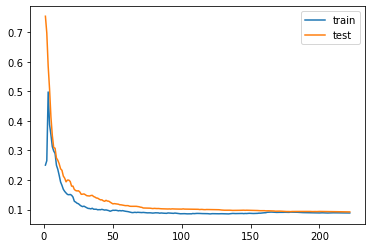

In [16]:
plot_learning_curve(clf1,X_train, X_valid, y_train, y_valid)

## lightGBM

In [17]:
'''
min_child_samples
一个叶子上的最小数据量。默认设置为20。根据数据量来确定，当数据量比较大时，
应该提升这个数值，让叶子节点的数据分布相对稳定，提高模型的泛华能力。
max_depth:
树模型的最大深度。防止过拟合的最重要的参数，一般限制为3~5之间。
是需要调整的核心参数，对模型性能和泛化能力有决定性作用。
num_leaves:
一棵树上的叶子节点个数。默认设置为31，和max_depth配合来空值树的形状，
一般设置为(0, 2^max_depth - 1]的一个数值。是一个需要重点调节的参数，对模型性能影响很大。
reg_alpha: 
L1正则化参数，别名：lambda_l1。默认设置为0。一般经过特征选择后这个参数不会有特别大的差异，
如果发现这个参数数值大，则说明有一些没有太大作用的特征在模型内。需要调节来控制过拟合。
reg_lambda: 
L2正则化参数，别名：lambda_l2。默认设置为0。较大的数值会让各个特征对模型的影响力趋于均匀，
不会有单个特征把持整个模型的表现。需要调节来控制过拟合
'''
clf = lgb.LGBMRegressor(learning_rate=0.05, # 学习率
                        n_estimators=300,# 集成树数量
                        min_child_samples=10,# 是叶节点所需的最小样本数
                        max_depth=5, # 决策树深度
                        num_leaves = 25,
                        colsample_bytree =0.8,#构建树时特征选择比例
                        subsample=0.8,# 抽样比例
                        reg_alpha = 0.5,
                        reg_lambda = 0.1 )
clf.fit(X_train, y_train)
score = mean_squared_error(y_valid, clf.predict(X_valid))
print("LGB模型均方误差:   ", score)

NameError: name 'lgb' is not defined

## Gradient Boosting

In [18]:
%%time
'''参数说明：
例如，如果min_sample_split = 6并且节点中有4个样本，则不会发生拆分（不管熵是多少）；
假设min_sample_leaf = 3并且一个含有5个样本的节点可以分别分裂成2个和3个大小的叶子节点，
那么这个分裂就不会发生，因为最小的叶子大小为3
损失函数loss：
'squared_error'：均方误差
'absolute_error'：绝对损失
'huber'：上面两者融合
'''
clf = GradientBoostingRegressor(learning_rate=0.03, # 学习率
                                loss='huber',  # 损失函数
                                max_depth=14, # 决策树深度
                                max_features='sqrt',# 节点分裂时参与判断的最大特征数
                                min_samples_leaf=10,# 是叶节点所需的最小样本数
                                min_samples_split=40,# 是分割所需的最小样本数
                                n_estimators=300,# 集成树数量
                                subsample=0.8)# 抽样比例
clf.fit(X_train, y_train)
score = mean_squared_error(y_valid, clf.predict(X_valid))
print("GradientBoostingRegressor:   ", score)

GradientBoostingRegressor:    0.10566145744460163
CPU times: user 4.01 s, sys: 41 ms, total: 4.05 s
Wall time: 4.06 s
